<a href="https://colab.research.google.com/github/JeanLucasAS/Modelo-Casas/blob/main/Modelo_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [ ]:
# Carregamento dos Dados

data = pd.read_csv('/content/house_price_regression_dataset.csv')
df = data
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


Aqui foi alterado o valor referente à qualidade da vizinhança, de 0 a 10 para 1 a 5 para faze com que o código seja mais efetivo nos testes.

In [ ]:
data ['Neighborhood_Quality'] = np.ceil(data['Neighborhood_Quality'] /2).astype(int)
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,3,2.623829e+05
1,4272,3,3,2016,4.753014,1,3,9.852609e+05
2,3592,1,2,2016,3.634823,0,5,7.779774e+05
3,966,1,2,1977,2.730667,1,4,2.296989e+05
4,4926,2,1,1993,4.699073,0,4,1.041741e+06


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB
None

Descrição estatística:
       Square_Footage  Num_Bedrooms  Num_Bathrooms   Year_Built     Lot_Size  \
count     1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean      2815.422000      2.990000       1.973000  1986.550000     2.778087   
std       1255.514921      1.427564      

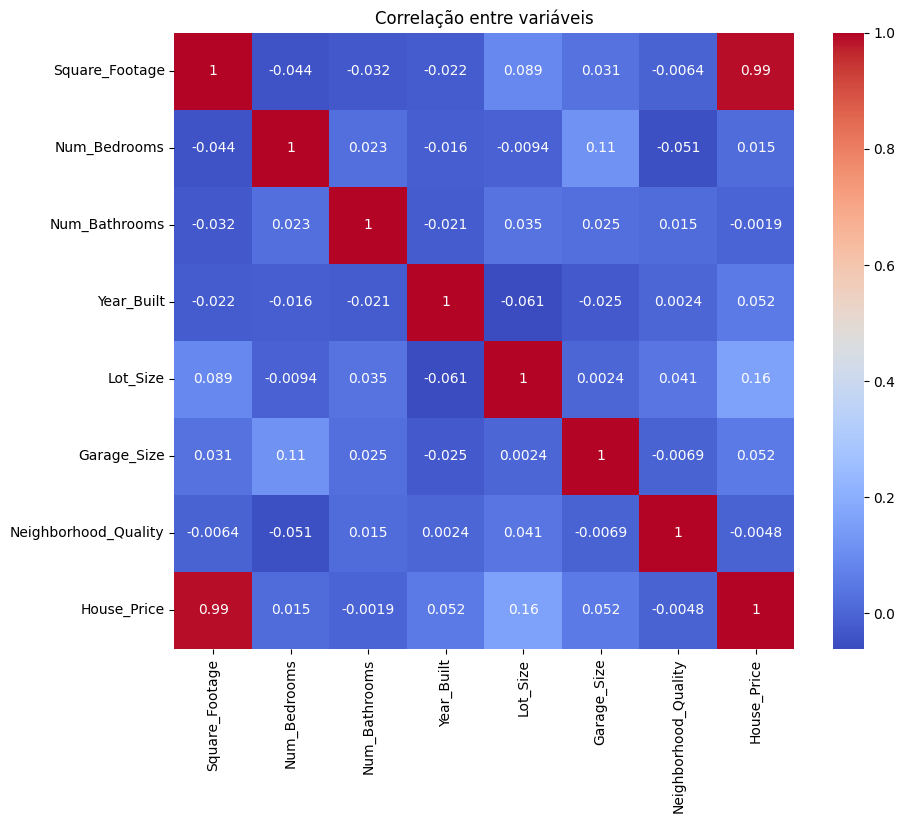

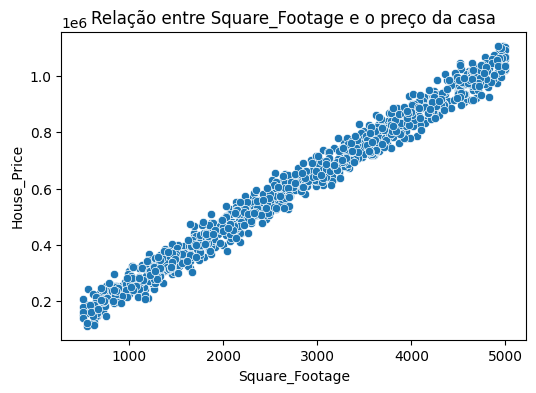

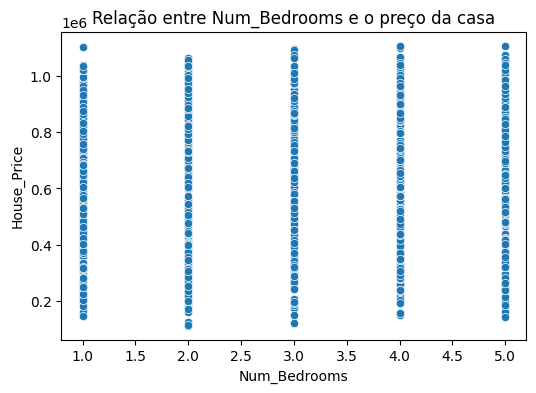

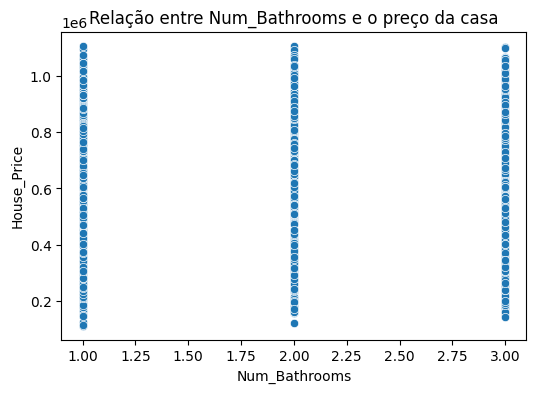

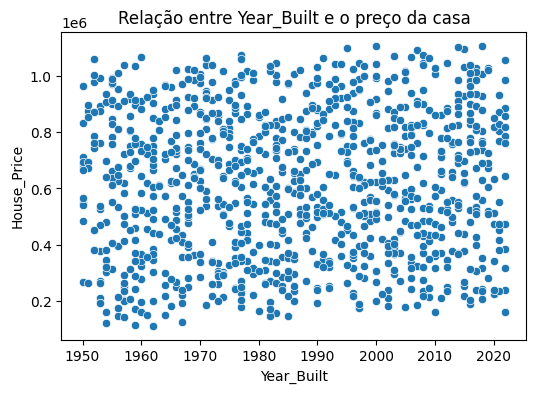

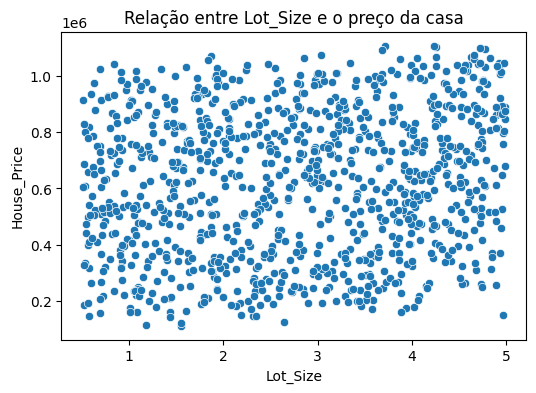

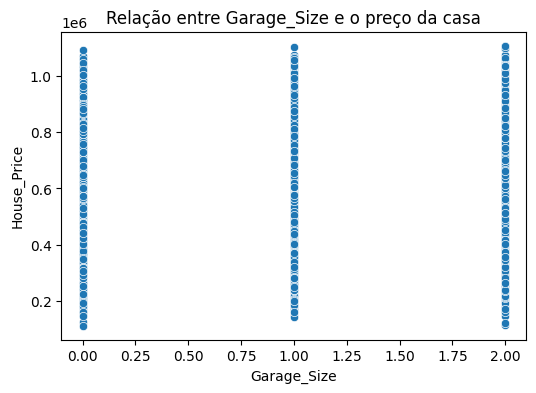

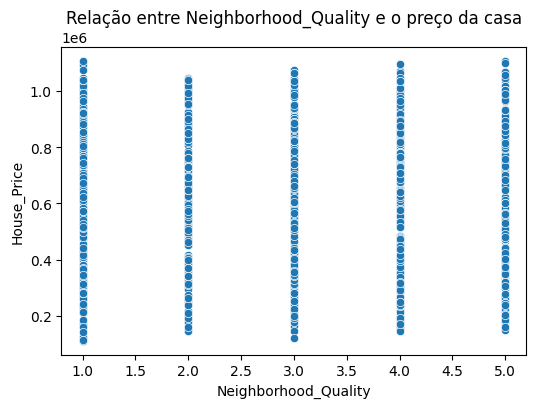

In [ ]:
# Análise Exploratória de Dados
print("Informações do dataset:")
print(df.info())

print("\nDescrição estatística:")
print(df.describe())

# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre variáveis")
plt.show()

# Gráficos de dispersão (relação entre variáveis e preço)
for col in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['House_Price'])
    plt.title(f"Relação entre {col} e o preço da casa")
    plt.show()

In [ ]:
# Pré-processamento
X = df.drop(columns=['House_Price'])
y = df['House_Price']

# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Treino e Teste dos Modelos

linear = LinearRegression()
rf = RandomForestRegressor(random_state=42)

errors_lr = []
errors_rf = []

# Executar 30 vezes
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=i)

    # Treinar modelos
    linear.fit(X_train, y_train)
    rf.fit(X_train, y_train)

    # Predizer
    y_pred_lr = linear.predict(X_test)
    y_pred_rf = rf.predict(X_test)

    # Calcular erro (MSE)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    mse_rf = mean_squared_error(y_test, y_pred_rf)

    errors_lr.append(mse_lr)
    errors_rf.append(mse_rf)

In [ ]:
# 6️⃣ Avaliação dos Modelos
# -------------------------------
print("\n=== RESULTADOS DOS MODELOS ===")
print(f"Linear Regression - Média do MSE: {np.mean(errors_lr):.4f} | Desvio padrão: {np.std(errors_lr):.4f}")
print(f"Random Forest - Média do MSE: {np.mean(errors_rf):.4f} | Desvio padrão: {np.std(errors_rf):.4f}")

# Escolher melhor modelo
if np.mean(errors_rf) < np.mean(errors_lr):
    best_model = rf
    best_name = "RandomForestRegressor"
else:
    best_model = linear
    best_name = "LinearRegression"

print(f"\n🏆 Melhor modelo: {best_name}")


=== RESULTADOS DOS MODELOS ===
Linear Regression - Média do MSE: 97473266.2096 | Desvio padrão: 7694906.2933
Random Forest - Média do MSE: 439942777.0348 | Desvio padrão: 49058273.5829

🏆 Melhor modelo: LinearRegression


In [ ]:
# 7️⃣ Exportar o Modelo com Joblib
# -------------------------------
joblib.dump(best_model, "modelo_casas.joblib")
print("\nModelo salvo como 'modelo_casas.joblib' com sucesso!")


Modelo salvo como 'modelo_casas.joblib' com sucesso!


In [ ]:
# 8️⃣ Exemplo de Uso do Modelo
# -------------------------------
# Pegar um exemplo aleatório
exemplo = X.iloc[0].values.reshape(1, -1)
exemplo_scaled = scaler.transform(exemplo)
pred = best_model.predict(exemplo_scaled)
print(f"\nExemplo de predição (1ª casa do dataset): ${pred[0]:.2f}")


Exemplo de predição (1ª casa do dataset): $266726.29


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
